<a href="https://colab.research.google.com/github/faraholivia/HutriNinda_PemrogramanPhython/blob/main/Farah_Olivia_H_TUGAS_PYTHON_MING_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cost(freq,tipe,htt,hru,d):
  #freq = frekuensi (MHz)
  #tipe = urban, suburban, open
  #htt = tinggi tower (meter)
  #hru = tinggi user (meter)
  #d = jarak (meter)
    if freq in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif freq in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((freq/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(freq))+18.33*(np.log10(freq))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(freq)-0.7)*hru-(1.56*np.log10(freq)-1.8)
    Lp = Ca+(Cb*np.log10(freq))-(13.83*np.log(htt))-ahr+((44.9-6.55*np.log10(htt))*np.log10(d))-Cm
    
    return Lp

In [ ]:
dmin=200 #m
dmax=700 #m
N=200 #banyak titik
d=np.random.randint(dmin,dmax,N)

f=1800 #MHz
locur="urban"
locsur="suburban"
locop="open"
tower=80 #m
user=1.5 #m

f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz

In [ ]:
LpUrban=cost(f,locur,tower,user,d)
LpSubUrban=cost(f,locsur,tower,user,d)
LpOpen=cost(f,locop,tower,user,d)

In [ ]:
Lpf1=cost(f1,locur,tower,user,d)
Lpf2=cost(f2,locur,tower,user,d)
Lpf3=cost(f3,locur,tower,user,d)

In [ ]:
d_sort = d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Sub_Urban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

In [ ]:
d_sort = d[np.argsort(d)]
f1_sort=Lpf1[np.argsort(d)]
f2_sort=Lpf2[np.argsort(d)]
f3_sort=Lpf3[np.argsort(d)]

<Figure size 432x288 with 0 Axes>

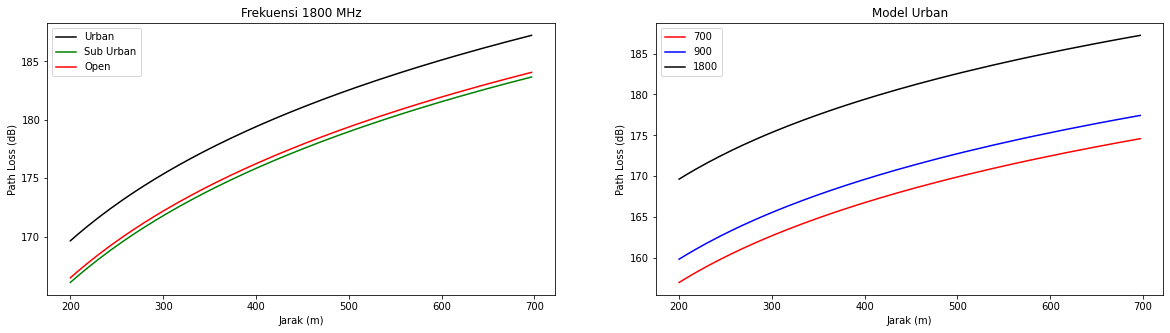

In [ ]:
plt.figure()
fig,(sb1,sb2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))

sb1.set_title("Frekuensi 1800 MHz")
sb1.plot(d_sort,Urban_sort, 'k', label='Urban')
sb1.plot(d_sort,Sub_Urban_sort,'g', label='Sub Urban')
sb1.plot(d_sort,Open_sort, 'r',label='Open')
sb1.set_xlabel('Jarak (m)')
sb1.set_ylabel('Path Loss (dB)')
sb1.legend()

sb2.set_title("Model Urban")
sb2.plot(d_sort,f1_sort, 'r', label="700")
sb2.plot(d_sort,f2_sort, 'b',label="900")
sb2.plot(d_sort,f3_sort, 'k', label="1800")
sb2.set_xlabel('Jarak (m)')
sb2.set_ylabel('Path Loss (dB)')
sb2.legend()

plt.show()